In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [2]:
import numpy as np
import pandas as pd
from matplotlib import style
import datetime
import pandas_datareader.data as web
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
# Get the stock data using yahoo API:
# get 2009-2019 data to train our model
train_data = web.DataReader('BBCA.JK', 'yahoo', datetime.datetime(2010,1,4),datetime.datetime(2019,12,1)) 

# get 2020 data to present date to test the SVM model
# test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,2), datetime.date.today()) 
test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,4), datetime.datetime(2021,12,1)) 

In [4]:
train_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1010.0,965.0,1010.0,1010.0,77812500.0,855.341248
2010-01-05,1020.0,990.0,1020.0,1020.0,44442500.0,863.809937
2010-01-06,1020.0,990.0,990.0,990.0,27782500.0,838.403809
2010-01-07,995.0,965.0,995.0,995.0,38632500.0,842.638245
2010-01-08,995.0,970.0,970.0,970.0,27427500.0,821.466492
...,...,...,...,...,...,...
2019-11-26,6330.0,6270.0,6330.0,6285.0,192783500.0,6034.974609
2019-11-27,6300.0,6240.0,6270.0,6300.0,58833500.0,6049.377930
2019-11-28,6295.0,6245.0,6295.0,6250.0,44248000.0,6001.366699


In [5]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-06,6750.0,6690.0,6720.0,6735.0,27300000.0,6487.538574
2020-01-07,6770.0,6730.0,6735.0,6740.0,45022500.0,6492.354492
2020-01-08,6745.0,6670.0,6670.0,6680.0,53692500.0,6434.559570
2020-01-09,6755.0,6730.0,6740.0,6740.0,40363500.0,6492.354492
2020-01-10,6825.0,6710.0,6765.0,6725.0,73362000.0,6477.905273
...,...,...,...,...,...,...
2021-11-26,7450.0,7250.0,7400.0,7275.0,113288400.0,7275.000000
2021-11-29,7425.0,7175.0,7275.0,7400.0,87907900.0,7400.000000
2021-11-30,7425.0,7275.0,7325.0,7275.0,144923700.0,7275.000000


In [6]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

# fix the date 
train_data.reset_index(inplace=True)
train_data.set_index("Date", inplace=True)
test_data.reset_index(inplace=True)
test_data.set_index("Date", inplace=True)

In [7]:
train_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1010.0,965.0,1010.0,1010.0,77812500.0,855.341248
2010-01-05,1020.0,990.0,1020.0,1020.0,44442500.0,863.809937
2010-01-06,1020.0,990.0,990.0,990.0,27782500.0,838.403809
2010-01-07,995.0,965.0,995.0,995.0,38632500.0,842.638245
2010-01-08,995.0,970.0,970.0,970.0,27427500.0,821.466492
...,...,...,...,...,...,...
2019-11-26,6330.0,6270.0,6330.0,6285.0,192783500.0,6034.974609
2019-11-27,6300.0,6240.0,6270.0,6300.0,58833500.0,6049.377930
2019-11-28,6295.0,6245.0,6295.0,6250.0,44248000.0,6001.366699


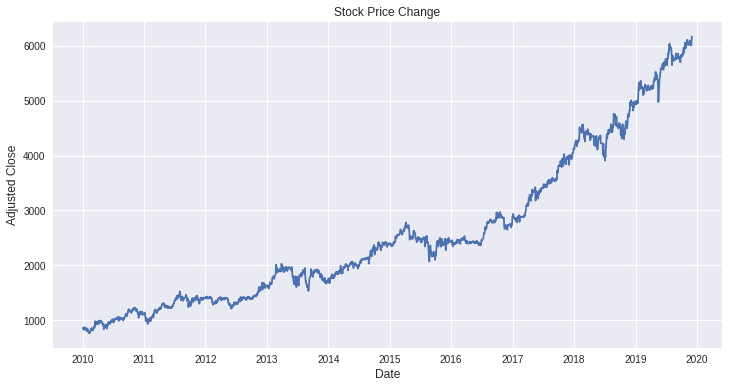

In [8]:
from matplotlib import pyplot as plt

style.use('seaborn')
plt.figure(figsize = (12,6))
plt.plot(train_data["Adj Close"])
plt.title("Stock Price Change")
plt.xlabel("Date", fontsize = 12)
plt.ylabel("Adjusted Close", fontsize = 12)
plt.show()

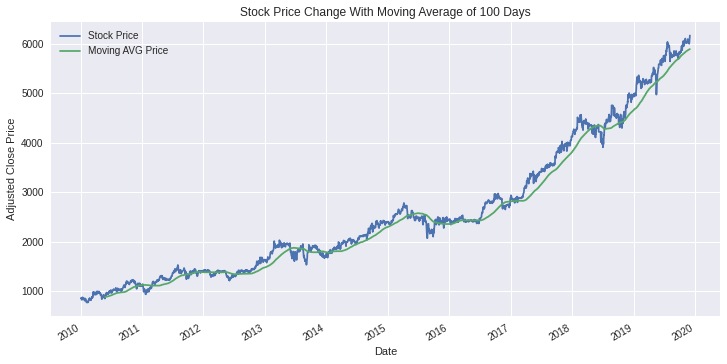

In [9]:
# Rolling mean
close_price = train_data['Adj Close']
moving_avg = close_price.rolling(window=100).mean()

plt.figure(figsize = (12,6))
plt.title("Stock Price Change With Moving Average of 100 Days")
close_price.plot(label='Stock Price')
moving_avg.plot(label='Moving AVG Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()

In [10]:
import matplotlib.dates as mdates

# change the dates into ints for training 
indxed_dates = train_data.copy()
indxed_dates = indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
actual_dates = indxed_dates['Date']

# convert to ints
indxed_dates['Date'] = indxed_dates['Date'].map(mdates.date2num)

indxed_dates

,Date,High,Low,Open,Close,Volume,Adj Close
0,733776.0,1010.0,965.0,1010.0,1010.0,77812500.0,855.341248
1,733777.0,1020.0,990.0,1020.0,1020.0,44442500.0,863.809937
2,733778.0,1020.0,990.0,990.0,990.0,27782500.0,838.403809
3,733779.0,995.0,965.0,995.0,995.0,38632500.0,842.638245
4,733780.0,995.0,970.0,970.0,970.0,27427500.0,821.466492
...,...,...,...,...,...,...,...
2467,737389.0,6330.0,6270.0,6330.0,6285.0,192783500.0,6034.974609
2468,737390.0,6300.0,6240.0,6270.0,6300.0,58833500.0,6049.377930
2469,737391.0,6295.0,6245.0,6295.0,6250.0,44248000.0,6001.366699
2470,737392.0,6295.0,6225.0,6230.0,6280.0,52954500.0,6030.173828


In [11]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates_data = indxed_dates['Date'].to_numpy()
prices_data = train_data['Adj Close'].to_numpy()

#Convert to 1d Vector
dates_data = np.reshape(dates_data, (len(dates_data), 1))
prices_data = np.reshape(prices_data, (len(prices_data), 1))

In [12]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1e4))
SVR_linear.fit(dates_data, prices_data)
SVR_linear_train = SVR_linear.predict(dates_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
SVR_linear_train

array([ 515.8816903 ,  516.97057477,  518.05945925, ..., 4452.19907588,
       4453.28796035, 4456.55461379])

In [14]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e4, gamma= 0.1)
SVR_rbfk.fit(dates_data, prices_data)
SVR_rbfk_train = SVR_rbfk.predict(dates_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
SVR_rbfk_train

array([ 855.44141051,  848.62518047,  850.4533194 , ..., 6001.46624966,
       6030.07420466, 6169.30484738])

In [16]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=3, epsilon=0.1, coef0=1))
SVR_poly.fit(dates_data, prices_data)
SVR_poly_train = SVR_poly.predict(dates_data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
SVR_poly_train

array([ 785.67791347,  786.87462309,  788.07012784, ..., 6196.40953352,
       6200.6864438 , 6213.53463995])

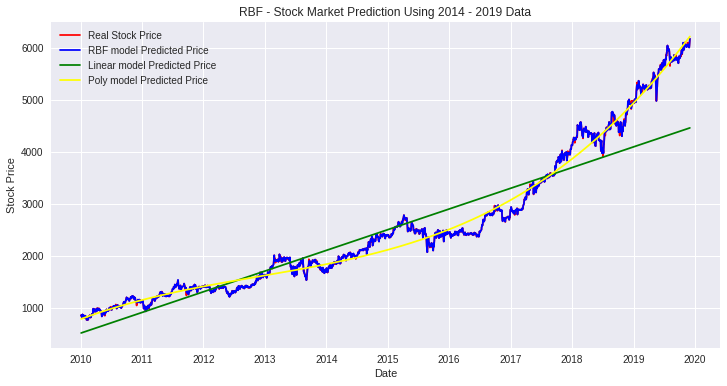

In [18]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2014 - 2019 Data')
plt.plot(dates_data, prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(actual_dates, SVR_rbfk_train, color= 'blue', label= 'RBF model Predicted Price') 
plt.plot(actual_dates, SVR_linear_train, color= 'green', label= 'Linear model Predicted Price') 
plt.plot(actual_dates, SVR_poly_train, color= 'yellow', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [19]:
# change the dates into ints for training 
test_indxed_dates = test_data.copy()
test_indxed_dates = test_indxed_dates.reset_index()

# Store the original dates for plotting the predicitons
test_actual_dates = test_indxed_dates['Date']

# convert to ints
test_indxed_dates['Date'] = test_indxed_dates['Date'].map(mdates.date2num)

In [20]:
test_indxed_dates

,Date,High,Low,Open,Close,Volume,Adj Close
0,737430.0,6750.0,6690.0,6720.0,6735.0,27300000.0,6487.538574
1,737431.0,6770.0,6730.0,6735.0,6740.0,45022500.0,6492.354492
2,737432.0,6745.0,6670.0,6670.0,6680.0,53692500.0,6434.559570
3,737433.0,6755.0,6730.0,6740.0,6740.0,40363500.0,6492.354492
4,737434.0,6825.0,6710.0,6765.0,6725.0,73362000.0,6477.905273
...,...,...,...,...,...,...,...
462,738120.0,7450.0,7250.0,7400.0,7275.0,113288400.0,7275.000000
463,738123.0,7425.0,7175.0,7275.0,7400.0,87907900.0,7400.000000
464,738124.0,7425.0,7275.0,7325.0,7275.0,144923700.0,7275.000000
465,738125.0,7450.0,7275.0,7275.0,7300.0,76538100.0,7300.000000


In [21]:
test_dates_data = test_indxed_dates['Date'].to_numpy()
test_prices_data = test_data['Adj Close'].to_numpy()

#Convert to 1d Vector
test_dates_data = np.reshape(test_dates_data, (len(test_dates_data), 1))
test_prices_data = np.reshape(test_prices_data, (len(test_prices_data), 1))

In [22]:
SVR_rbfk = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
SVR_rbfk.fit(test_dates_data, test_prices_data)
SVR_rbfk_test = SVR_rbfk.predict(test_dates_data)
SVR_rbfk_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6487.43852861, 6492.25425415, 6492.74907452, 6492.25449751,
       6478.00494772, 6497.27111083, 6549.05419241, 6583.76408054,
       6604.25463683, 6622.29491654, 6583.76404247, 6579.14784238,
       6588.57979772, 6583.18118354, 6559.88296409, 6588.57983079,
       6589.56822402, 6535.60169874, 6410.71584211, 6242.0076894 ,
       6203.47775817, 6357.39841988, 6468.14488871, 6508.87913948,
       6511.52005865, 6535.60133362, 6554.37743863, 6550.04998119,
       6501.99345559, 6437.1842842 , 6472.98943453, 6467.19757024,
       6429.72181772, 6393.94893626, 6371.84770033, 6285.35512065,
       6237.72657479, 6184.21199625, 6128.19687192, 6058.78953118,
       5950.83859019, 6087.68644233, 6203.27760921, 6166.17491434,
       5972.29543783, 5682.98137599, 5707.20052094, 5617.26562409,
       5451.75270411, 5355.81080629, 5355.61084831, 5099.00562815,
       4816.38738323, 4641.08415152, 4560.92397037, 4275.50779555,
       4412.20924585, 5085.89872203, 5307.64844702, 5346.98863

In [23]:
SVR_linear = make_pipeline(StandardScaler(), SVR(kernel='linear', C=1))
SVR_linear.fit(test_dates_data, test_prices_data)
SVR_linear_test =  SVR_linear.predict(test_dates_data)
SVR_linear_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([6051.0550222 , 6051.69943621, 6052.34385022, 6052.98826424,
       6053.63267825, 6055.56592029, 6056.2103343 , 6056.85474832,
       6057.49916233, 6058.14357634, 6060.07681838, 6060.7212324 ,
       6061.36564641, 6062.01006042, 6062.65447444, 6064.58771648,
       6065.23213049, 6065.8765445 , 6066.52095852, 6067.16537253,
       6069.09861457, 6069.74302858, 6070.3874426 , 6071.03185661,
       6071.67627062, 6073.60951266, 6074.25392668, 6074.89834069,
       6075.5427547 , 6076.18716872, 6078.12041076, 6078.76482477,
       6079.40923878, 6080.0536528 , 6080.69806681, 6082.63130885,
       6083.27572286, 6083.92013688, 6084.56455089, 6085.2089649 ,
       6087.14220694, 6087.78662096, 6088.43103497, 6089.07544898,
       6089.719863  , 6091.65310504, 6092.29751905, 6092.94193306,
       6093.58634708, 6094.23076109, 6096.16400313, 6096.80841714,
       6097.45283116, 6098.09724517, 6098.74165918, 6100.67490122,
       6101.31931524, 6102.60814326, 6103.25255728, 6105.18579

In [24]:
SVR_poly = make_pipeline(StandardScaler(), SVR(kernel='poly', C=1e3, degree=4, epsilon=0.1, coef0=1))
SVR_poly.fit(test_dates_data, test_prices_data)
SVR_poly_test = SVR_poly.predict(test_dates_data)
SVR_poly_test

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([7012.71111942, 6979.36886215, 6946.45589092, 6913.96939582,
       6881.90657497, 6788.23225941, 6757.83627713, 6727.85007998,
       6698.27091419, 6669.09603404, 6583.96977017, 6556.38473547,
       6529.19037798, 6502.38400007, 6475.96291214, 6398.9846125 ,
       6374.07794885, 6349.54324747, 6325.37786687, 6301.57917359,
       6232.35700332, 6209.99888507, 6187.99440714, 6166.34098416,
       6145.03603883, 6083.18641573, 6063.24976812, 6043.64883184,
       6024.38107769, 6005.44398448, 5950.59157899, 5932.95207813,
       5915.63075261, 5898.62512936, 5881.93274334, 5833.71047854,
       5818.24655142, 5803.08365663, 5788.21937724, 5773.65130435,
       5731.70035596, 5718.29318046, 5705.17028725, 5692.32931556,
       5679.76791262, 5643.73770901, 5632.27121388, 5621.07264399,
       5610.13969472, 5599.47006943, 5569.0182916 , 5559.37915647,
       5549.99198253, 5540.85452127, 5531.96453222, 5506.75711382,
       5498.8347692 , 5483.69705794, 5476.47731459, 5456.18844

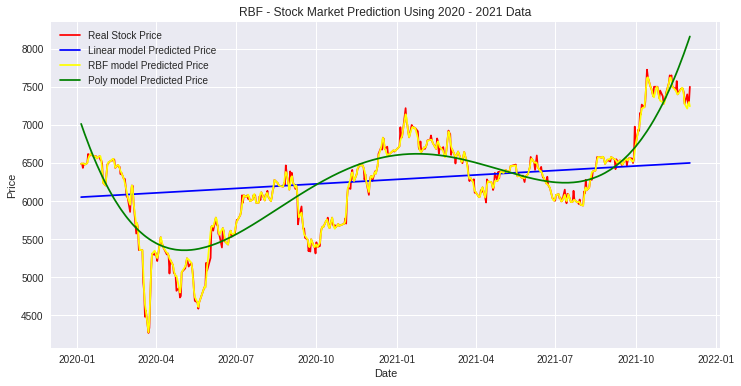

In [25]:
plt.figure(figsize = (12,6))
plt.title('RBF - Stock Market Prediction Using 2020 - 2021 Data')
plt.plot(test_dates_data, test_prices_data, color= 'red', label= 'Real Stock Price')
plt.plot(test_actual_dates, SVR_linear_test, color= 'blue', label= 'Linear model Predicted Price')
plt.plot(test_actual_dates, SVR_rbfk_test, color= 'yellow', label= 'RBF model Predicted Price')
plt.plot(test_actual_dates, SVR_poly_test, color= 'green', label= 'Poly model Predicted Price') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("SVR RBF Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_rbfk_train)))

print("SVR RBF Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_rbfk_train))

print("SVR RBF Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_rbfk_train))

print("SVR RBF Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_rbfk_test)))

print("SVR RBF Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_rbfk_test))

print("SVR RBF Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_rbfk_test))


SVR RBF Train RMSE: 12.82
SVR RBF Train R2 Score: 1.00
SVR RBF Train MAE Score: 4.24
SVR RBF Test RMSE: 54.45
SVR RBF Test R2 Score: 0.99
SVR RBF Test MAE Score: 25.97


In [27]:
print("SVR Linear Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_linear_train)))

print("SVR Linear Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_linear_train))

print("SVR Linear Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_linear_train))

print("SVR Linear Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_linear_test)))

print("SVR Linear Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_linear_test))

print("SVR Linear Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_linear_test))

SVR Linear Train RMSE: 520.70
SVR Linear Train R2 Score: 0.86
SVR Linear Train MAE Score: 377.28
SVR Linear Test RMSE: 572.66
SVR Linear Test R2 Score: 0.21
SVR Linear Test MAE Score: 442.54


In [28]:
print("SVR Poly Train RMSE: %.2f"
      % np.sqrt(mean_squared_error(prices_data, SVR_poly_train)))

print("SVR Poly Train R2 Score: %.2f"
      % r2_score(prices_data, SVR_poly_train))

print("SVR Poly Train MAE Score: %.2f"
      % mean_absolute_error(prices_data, SVR_poly_train))

print("SVR Poly Test RMSE: %.2f"
      % np.sqrt(mean_squared_error(test_prices_data, SVR_poly_test)))

print("SVR Poly Test R2 Score: %.2f"
      % r2_score(test_prices_data, SVR_poly_test))

print("SVR Poly Test MAE Score: %.2f"
      % mean_absolute_error(test_prices_data, SVR_poly_test))

SVR Poly Train RMSE: 172.68
SVR Poly Train R2 Score: 0.99
SVR Poly Train MAE Score: 130.61
SVR Poly Test RMSE: 339.74
SVR Poly Test R2 Score: 0.72
SVR Poly Test MAE Score: 261.88
